LINEAR REGRESSION MODEL

IMPORTS

In [51]:
import torch
from torch import nn

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

HYPERPARAMETERS

In [52]:
LEARNING_RATE = 0.01
INPUT_SHAPE = 1
OUTPUT_SHAPE = 1
EPOCHS = 1000
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cpu'

CREATING LINEAR DATA

In [53]:
# Making
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = 0.7 * X + 0.3

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

VISUALIZING DATA

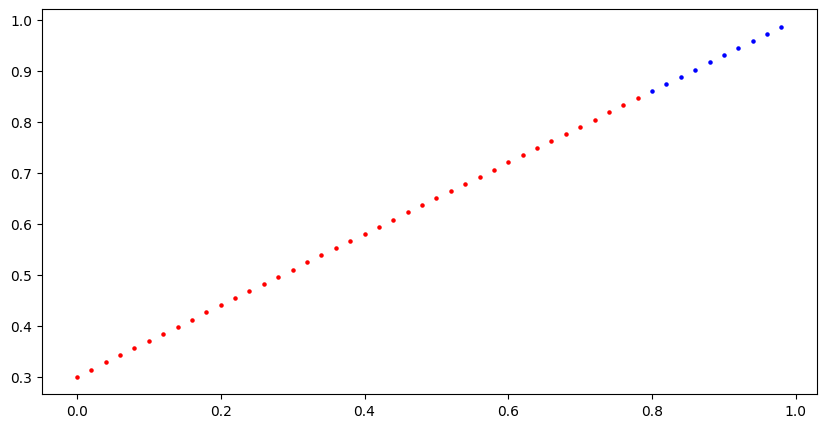

In [54]:
def plot_data(train_data: torch.Tensor = X_train,
              train_labels: torch.Tensor = y_train,
              test_data: torch.Tensor = X_test,
              test_labels:torch.Tensor = y_test,
              predictions: torch.Tensor = None):
    
    plt.figure(figsize=(10, 5))

    plt.scatter(X_train, y_train, c="red", s=5)
    plt.scatter(X_test, y_test, c="blue", s=5)

    if predictions is not None:
        plt.scatter(X_test, predictions, c="green", s=5)

plot_data(X_train, y_train, X_test, y_test)

CREATING A MODEL

In [55]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_shape: int, output_shape: int):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=input_shape,
                                      out_features=output_shape)
    def forward(self, x):
        return self.linear_layer(x)
    
model = LinearRegressionModel(INPUT_SHAPE, OUTPUT_SHAPE).to(DEVICE)
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7234]])),
             ('linear_layer.bias', tensor([0.0203]))])

TRAIN-TEST LOOP

In [56]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=LEARNING_RATE)

for epoch in range(1, EPOCHS + 1):
    # TRAINING
    model.train()

    #1 Forward pass
    train_pred = model(X_train)

    #2 Calculate loss
    train_loss = loss_fn(train_pred, y_train)

    #3 Zero grad optimizer
    optimizer.zero_grad()

    #4 Loss backward
    train_loss.backward()

    #5 Optimizer step
    optimizer.step()

    # TESTING
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}")

Epoch: 100 | Train Loss: 0.008980406448245049 | Test Loss: 0.005402082111686468
Epoch: 200 | Train Loss: 0.008980406448245049 | Test Loss: 0.005402082111686468
Epoch: 300 | Train Loss: 0.008980406448245049 | Test Loss: 0.005402082111686468
Epoch: 400 | Train Loss: 0.008980406448245049 | Test Loss: 0.005402082111686468
Epoch: 500 | Train Loss: 0.008980406448245049 | Test Loss: 0.005402082111686468
Epoch: 600 | Train Loss: 0.008980406448245049 | Test Loss: 0.005402082111686468
Epoch: 700 | Train Loss: 0.008980406448245049 | Test Loss: 0.005402082111686468
Epoch: 800 | Train Loss: 0.008980406448245049 | Test Loss: 0.005402082111686468
Epoch: 900 | Train Loss: 0.008980406448245049 | Test Loss: 0.005402082111686468
Epoch: 1000 | Train Loss: 0.008980406448245049 | Test Loss: 0.005402082111686468


VISUALIZING PREDICTIONS

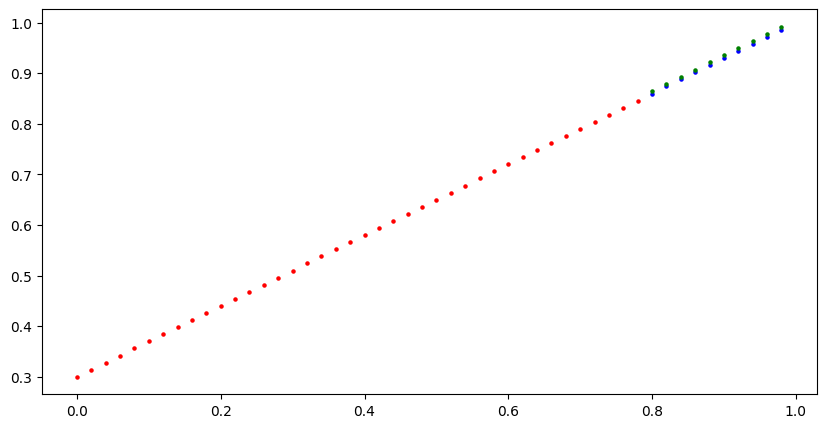

In [57]:
with torch.inference_mode():
    preds = model(X_test)

plot_data(predictions=preds)